In [218]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from datetime import datetime, timedelta
from collections import OrderedDict 

In [219]:
# read file
df = pd.read_csv("data_netsuite10-11.csv", index_col='Estimate')
# clean data
### clean col names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('\(', '_').str.replace('\)', '_')
### format date col
df['dia_solicitud_aprobada'] = pd.to_datetime(df['dia_solicitud_aprobada'])
### only include cars with KCapital
df =  df[df['financiamiento_ganado'] == 'Yes']
### select relevant cols
df = df[['dia_solicitud_aprobada', 'cotizar_kavak_total', 'autorizacion_del_cliente']]
# examine data
print(df.shape)
df.head()

(739, 3)


,dia_solicitud_aprobada,cotizar_kavak_total,autorizacion_del_cliente
Estimate,,,
1968942,2020-08-07,No,No
1969160,2020-08-08,No,No
1969283,2020-08-05,No,No
1969677,2020-08-03,No,No
1969976,2020-08-13,No,No


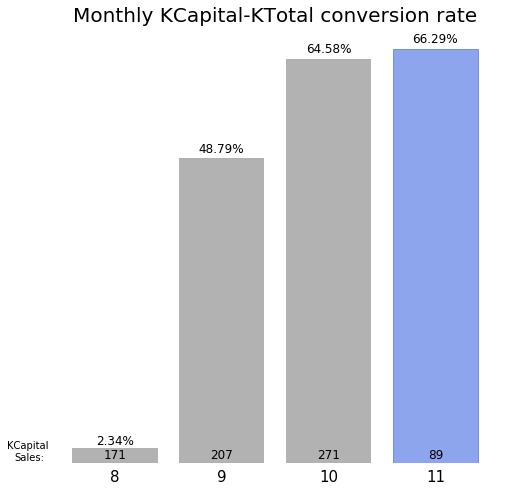

In [220]:
# Graph 1: Monthly report
### create month col
df['month'] = df['dia_solicitud_aprobada'].dt.month
### initialize dics
monthly_kcapital = {}
monthly_data = {}
### calculate monthly percentage
for group, frame in df.groupby(['month']):
    kcapital = len(frame)
    ktotal = 0
    for i in range(kcapital):
        if((frame['cotizar_kavak_total'].iloc[i] == 'Yes') & 
                   (frame['autorizacion_del_cliente'].iloc[i] == 'Yes')): ktotal += 1
    monthly_kcapital[group] = kcapital
    monthly_data[group] = float(ktotal)/float(kcapital)
### set x and y values
x_month = monthly_data.keys()
y_month = monthly_data.values()
### create figure and format axes
figure(figsize=(8,8))
bar1 = plt.bar(x_month, y_month, alpha=.6, color="gray")
plt.title('Monthly KCapital-KTotal conversion rate', 
          fontdict={'fontsize': 20})
plt.xticks(x_month, fontsize=15)
plt.yticks([])
### label bars
plt.text(7.2, 0,"KCapital \nSales:", fontsize=10, ha='center', va='bottom', rotation=0)
def autolabel(rects):
    for idx,rect in enumerate(bar1):
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2., 1.008*height,
                "{:.2%}".format(y_month[idx]), fontsize=12,
                ha='center', va='bottom', rotation=0)
        plt.text(rect.get_x() + rect.get_width()/2., .0015,
                monthly_kcapital.values()[idx], fontsize=12,
                ha='center', va='bottom', rotation=0)
autolabel(bar1)
### add color to current bar
bar1[len(x_month)-1].set_color('royalblue')
### remove spines and tick marks
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().tick_params(bottom=False)
plt.savefig('monthly_update.pdf')  

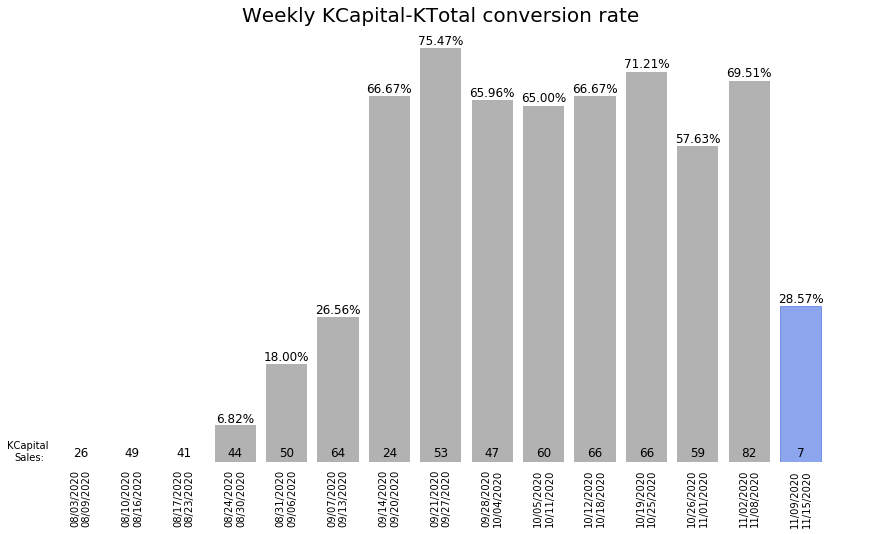

In [221]:
# Graph 2: Weekly report
### create week col
df['week'] = df['dia_solicitud_aprobada'].dt.week
### initialize dics
weekly_kcapital = {}
weekly_data = {}
weekly_dates = {}
### calculate weekly percentage
for group, frame in df.groupby(['week']):
    kcapital = len(frame)
    ktotal = 0
    for i in range(kcapital):
        if((frame['cotizar_kavak_total'].iloc[i] == 'Yes') & 
                   (frame['autorizacion_del_cliente'].iloc[i] == 'Yes')): ktotal += 1
    weekly_kcapital[group] = kcapital
    ##### extract dates of begining and end of week
    one_day = timedelta(days=1)
    sun_date = min(frame['dia_solicitud_aprobada']).date()
    while sun_date.weekday() != 0:
        sun_date = sun_date - one_day
    sat_date = max(frame['dia_solicitud_aprobada']).date()
    while sat_date.weekday() != 6:
        sat_date = sat_date + one_day
    weekly_dates[group] = ('\n'.join([sun_date.strftime('%m/%d/%Y'),sat_date.strftime('%m/%d/%Y')]))
    #####
    weekly_data[group] = float(ktotal)/float(kcapital)
### set x and y values
x_week = weekly_data.keys()
y_week = weekly_data.values()
### create figure and format axes
figure(figsize=(15,8))
bar2 = plt.bar(x_week, y_week, alpha=.6, color="gray")
plt.title('Weekly KCapital-KTotal conversion rate', 
          fontdict={'fontsize': 20})
plt.xticks(weekly_dates.keys(), weekly_dates.values(), fontsize=10, rotation='vertical')
plt.yticks([])
### label bars
plt.text(31, 0,"KCapital \nSales:", fontsize=10, ha='center', va='bottom', rotation=0)
def autolabel(rects):
    for idx,rect in enumerate(bar2):
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2., .005,
            weekly_kcapital.values()[idx], fontsize=12,
            ha='center', va='bottom', rotation=0)
        if(round(y_week[idx], 2) == 0.00): 
            continue 
        else:
            plt.text(rect.get_x() + rect.get_width()/2., 1.003*height,
                "{:.2%}".format(y_week[idx]), fontsize=12,
                ha='center', va='bottom', rotation=0)
autolabel(bar2)
### add color to current bar
bar2[len(x_week)-1].set_color('royalblue')
### remove spines and tick marks
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().tick_params(bottom=False)
plt.savefig('weekly_update.pdf')  

/opt/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


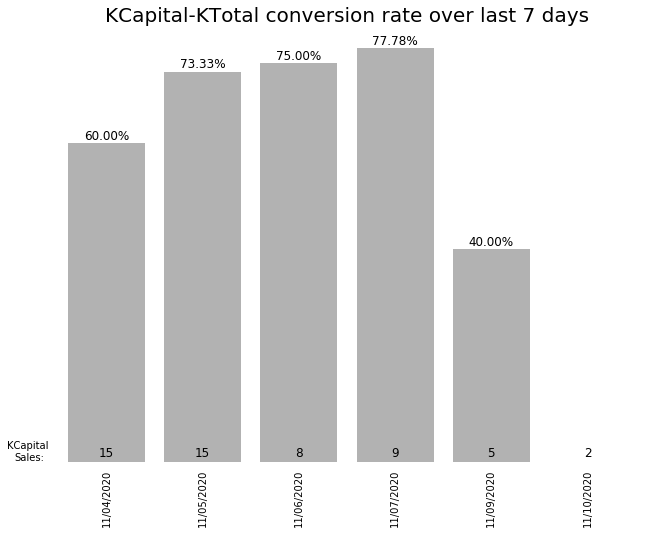

In [222]:
# Graph 3: Daily report
last_update = max(df['dia_solicitud_aprobada']).date()
week_ago = last_update - timedelta(days=6)
past_week_df = df[(df['dia_solicitud_aprobada'] >= pd.Timestamp(week_ago)) & 
                  (df['dia_solicitud_aprobada'] <= pd.Timestamp(last_update))]
### create day col
past_week_df['date'] = past_week_df['dia_solicitud_aprobada'].dt.strftime("%d")
### initialize dics
daily_kcapital = {}
daily_data = {}
daily_dates = {}
### calculate daily percentage
for group, frame in past_week_df.groupby(['date']):
    kcapital = len(frame)
    ktotal = 0
    for i in range(kcapital):
        if((frame['cotizar_kavak_total'].iloc[i] == 'Yes') & 
                   (frame['autorizacion_del_cliente'].iloc[i] == 'Yes')): ktotal += 1
    daily_kcapital[group] = kcapital
    daily_data[group] = float(ktotal)/float(kcapital)
    daily_dates[group] = min(frame['dia_solicitud_aprobada']).date().strftime('%m/%d/%Y')
daily_kcapital = OrderedDict(sorted(daily_kcapital.items()))
daily_data = OrderedDict(sorted(daily_data.items()))
daily_dates = OrderedDict(sorted(daily_dates.items()))
### set x and y values
x_day = daily_data.keys()
y_day = daily_data.values()
### create figure and format axes
figure(figsize=(11,8))
bar3 = plt.bar(x_day, y_day, alpha=.6, color="gray")
plt.title('KCapital-KTotal conversion rate over last 7 days', 
          fontdict={'fontsize': 20})
plt.xticks(daily_dates.keys(), daily_dates.values(), fontsize=10, rotation='vertical')
plt.yticks([])
### label bars
plt.text(-.8, 0,"KCapital \nSales:", fontsize=10, ha='center', va='bottom', rotation=0)
def autolabel(rects):
    for idx,rect in enumerate(bar3):
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2., .005,
            daily_kcapital.values()[idx], fontsize=12,
            ha='center', va='bottom', rotation=0)
        if(round(y_day[idx], 2) == 0.00): 
            continue 
        else:
            plt.text(rect.get_x() + rect.get_width()/2., 1.003*height,
                "{:.2%}".format(y_day[idx]), fontsize=12,
                ha='center', va='bottom', rotation=0)
autolabel(bar3)
### add color to current bar
bar3[len(x_day)-1].set_color('royalblue')
### remove spines and tick marks
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().tick_params(bottom=False)
plt.savefig('daily_update.pdf')  
